# Assignment 3

In [2]:
import sys
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import Adam
from keras import backend as K
import talos as ta

from app.preprocessing import load_dataset, load_embeddings, preprocess_data


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. Remove *punctuation* characters
2. Remove *stopwords*
3. Remove *links*
4. Remove *Numbers*
5. Format into *lowercase*

In [3]:
data = load_dataset(load_from_pickle=False)
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())
data['post'][0]

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


'causing behavior c# datetime type <pre><code>[test] public void sadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring()))); } </code></pre> failed <pre><code> expected: - - : : . was: - - : : . </code></pre> wish know happening behind scenes tostring() etc cause behavior. edit seeing jon answer <pre><code>[test] public void newsadness() { var datetime = datetime.utcnow; assert.that(datetime is.equalto(datetime.parse(datetime.tostring( )))); } </code></pre> result <pre><code>expected: - - : : . was: - - : : . </code></pre> result capital small reading docs still unclear.'

## MLP classifier in Keras using tf*idf features

 ### Hyper parameter tuning for the **tf-idf** model

In [48]:
from app.models import load_model
# 70% Train & 30% Test
# 70% Train-Dev % 30* Train-Dev 
model_data_tf = preprocess_data(data, 'tags', 'post',
                                input_ins='as_tf_idf',
                                cv_split_full=0.3,
                                cv_split_dev=0.3)
##### Simplified configuration
tf_idf_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [20, 40],
    'activation': ['relu'],
    'dropout': [0.2],
    'first_hidden_layer': [10],
    'epochs': [3, 4],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

##### Production configuration
# tf_idf_model_config = {
#     'visualize_proccess': [False],
#     'first_neuron': [64, 128],  # First Layer
#     'activation': ['relu', 'tanh'],
#     'dropout': [0.2, 0.4, 0.6],
#     'first_hidden_layer': [64, 128],
#     'epochs': [5, 10, 15],
#     'batch_size': [32, 64],
#     'model_type': ['keras_tf_idf_model'],
# }

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=1,
                               print_params=True,
                               seed=(123)
                               )


  0%|          | 0/8 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 20, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 12%|█▎        | 1/8 [00:06<00:48,  6.91s/it]

{'visualize_proccess': False, 'first_neuron': 40, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 25%|██▌       | 2/8 [00:14<00:42,  7.10s/it]

{'visualize_proccess': False, 'first_neuron': 40, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 3, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 38%|███▊      | 3/8 [00:23<00:37,  7.55s/it]

{'visualize_proccess': False, 'first_neuron': 40, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 3, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 50%|█████     | 4/8 [00:28<00:28,  7.04s/it]

{'visualize_proccess': False, 'first_neuron': 20, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 3, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 62%|██████▎   | 5/8 [00:36<00:21,  7.20s/it]

{'visualize_proccess': False, 'first_neuron': 20, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 75%|███████▌  | 6/8 [00:46<00:15,  7.99s/it]

{'visualize_proccess': False, 'first_neuron': 20, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 3, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 88%|████████▊ | 7/8 [00:51<00:07,  7.24s/it]

{'visualize_proccess': False, 'first_neuron': 40, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 10, 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


100%|██████████| 8/8 [01:03<00:00,  8.53s/it]


In [39]:
report_tf = ta.Reporting(history_model_tf_idf)

# get best model configuration
# report_tf.best_params('val_f1', ascending=True)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 4,
 'val_loss': 0.8015945926308632,
 'val_f1': 0.5422713059186935,
 'val_accuracy': 0.9772083111604055,
 'loss': 1.1281158940281186,
 'f1': 0.463815030498164,
 'accuracy': 0.9666919354030065,
 'visualize_proccess': 'False',
 'first_neuron': 20,
 'activation': 'relu',
 'dropout': 0.2,
 'first_hidden_layer': 10,
 'epochs': 4,
 'model_type': 'keras_tf_idf_model'}

### Visualize Model Training History

In [42]:
# Train and Load the best model of given the tuned featured model
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)

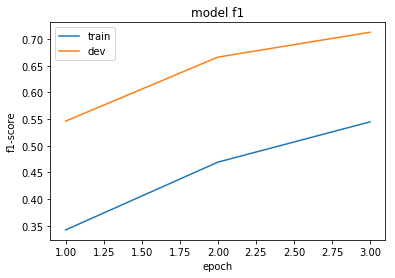

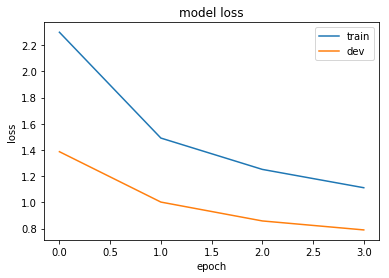

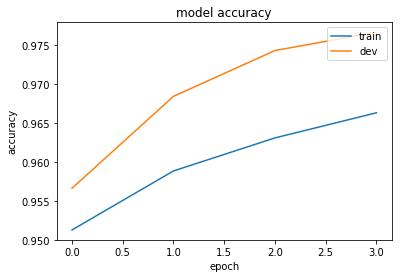

In [43]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)

### Evaluate performance of tf-idf MLP model

Evaluates the performance of the best trained model in the **test** dataset. 

In [4]:
score = model_tf.evaluate(model_data_tf['x_test'],
                          model_data_tf['y_test'],
                          batch_size=best_model_params['batch_size'],
                          verbose=1)

print('\nTest precision: %.4f' %  (score[1]))
print('\nTest recall: %.4f' %  (score[2]))
print('\nTest f1: %.4f' % (score[3]))
print('\nTest accuracy: %.4f'% (score[4]))

NameError: name 'model_tf' is not defined

### Visualize Prediction Perfomance of tf-idf MLP model

--------------------------------------------------------------------------------
Accuracy Score: 81.27%
--------------------------------------------------------------------------------
Confusion Matrix:

               predicted_sql  predicted_ruby-on-rails  predicted_android  \
sql                      255                        3                  0   
ruby-on-rails              4                      361                  0   
android                    2                        0                388   
angularjs                 32                        4                  1   
asp.net                    2                        0                  1   
c                         42                        6                  0   
c#                         3                        0                  0   
c++                        2                        1                  0   
css                        5                        2                  1   
html                       4        

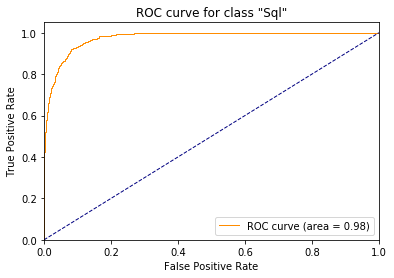

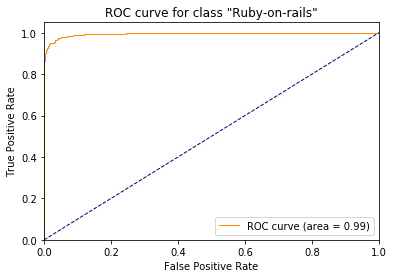

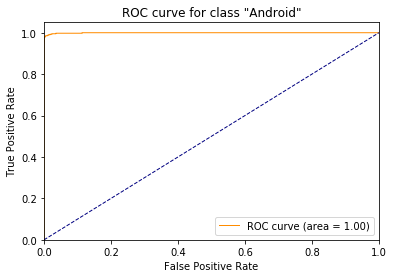

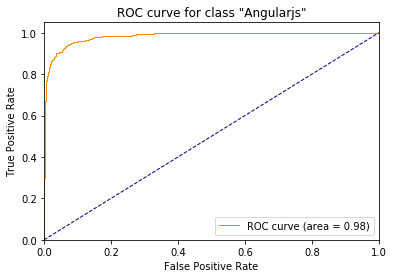

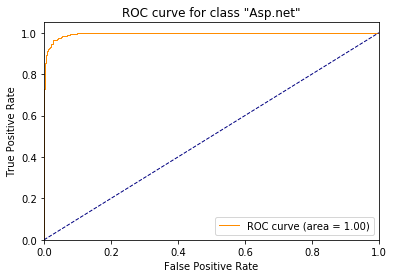

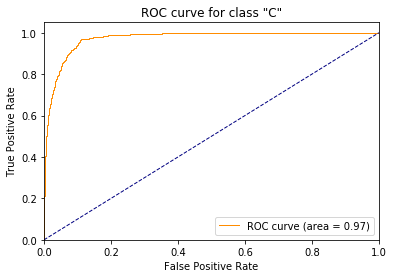

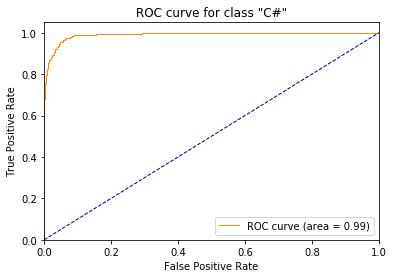

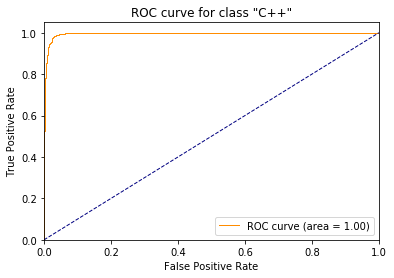

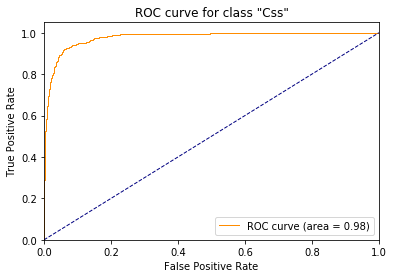

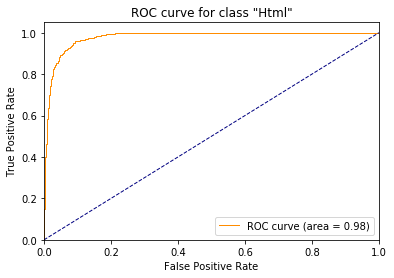

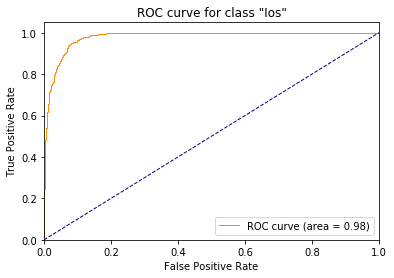

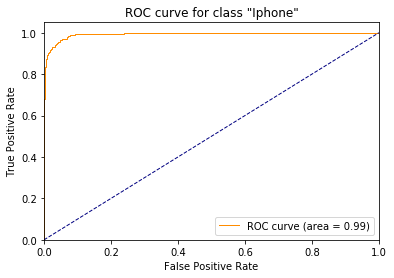

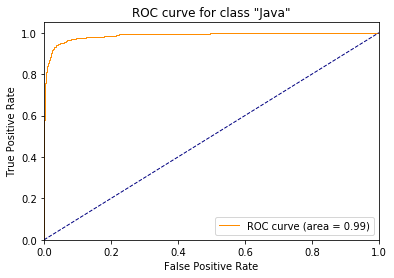

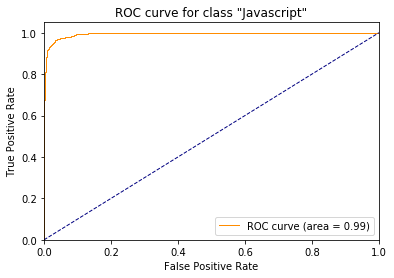

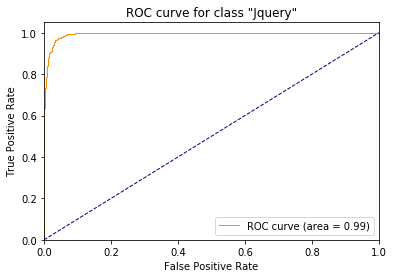

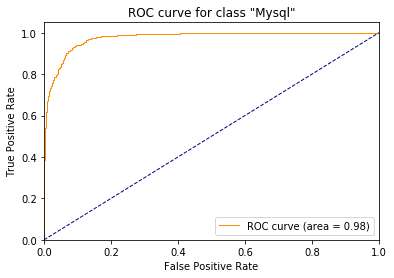

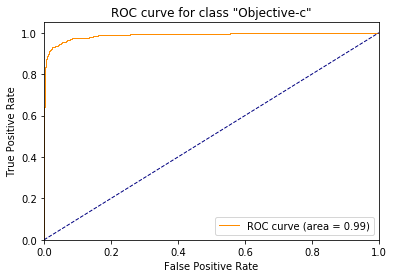

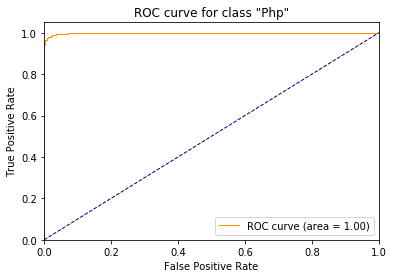

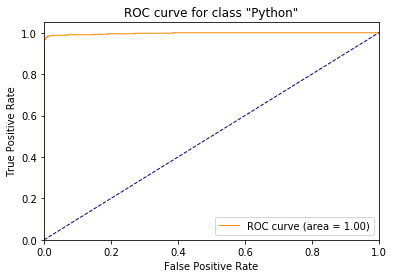

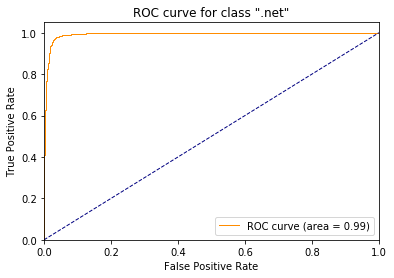

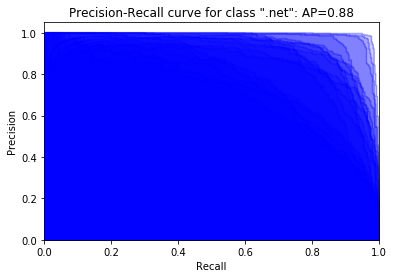

In [19]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve)
import matplotlib.pylab as plt

prediction_val = model.predict(model_data_tf['x_test'], batch_size=best_model_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed = np.array([np.argmax(val) for val in prediction_val])
y_true_processed = np.array([np.argmax(val) for val in model_data_tf['y_test']])

# plot_roc_curve(model_data_tf['y_test'], prediction_val, Classes, 1)
# plot_precision_recall_curve(model_data_tf['y_test'], prediction_val, Classes , 1)
confusion = create_clf_report(y_true_processed, y_pred_processed, Classes)
confusion

In [22]:
confusion

,predicted_sql,predicted_ruby-on-rails,predicted_android,predicted_angularjs,predicted_asp.net,predicted_c,predicted_c#,predicted_c++,predicted_css,predicted_html,predicted_ios,predicted_iphone,predicted_java,predicted_javascript,predicted_jquery,predicted_mysql,predicted_objective-c,predicted_php,predicted_python,predicted_.net
sql,255,3,0,34,0,77,4,1,3,1,3,6,3,0,0,1,3,3,0,3
ruby-on-rails,4,361,0,0,1,0,0,2,1,9,6,9,1,0,1,2,1,1,1,0
android,2,0,388,0,1,0,0,1,1,0,1,0,4,1,0,0,1,0,0,0
angularjs,32,4,1,302,2,16,0,2,18,0,1,2,5,1,2,0,1,1,3,7
asp.net,2,0,1,0,362,7,19,0,0,0,0,0,2,0,0,1,1,4,1,0
c,42,6,0,13,4,274,11,0,10,0,2,14,7,0,1,2,2,5,0,7
c#,3,0,0,0,41,22,311,1,2,1,1,7,2,0,2,3,1,2,0,1
c++,2,1,0,1,0,0,1,349,38,0,0,0,3,5,0,0,0,0,0,0
css,5,2,1,7,2,2,0,47,285,1,0,2,18,13,0,1,11,0,0,3
html,4,6,0,0,1,3,0,1,5,269,59,2,2,0,1,45,0,1,1,0


## Text classification with FastText Embedding Centroids

### Load Embeddings

In [5]:
### If 'cc.en.300.bin.gz' is not downloaded then comment out the below lines
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
# !gzip -d cc.en.300.bin.gz

embeddings_ftc = load_embeddings(data, 'post', minimized=False)
model_data_ftc = preprocess_data(data, 'tags', 'post', 'as_centroids', embeddings=embeddings_ftc)

In [6]:
from app.models import load_model
##### Simplified configuration
ftc_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [512],
    'activation': ['relu'],
    'dropout': [0.2],
    'first_hidden_layer': [256],
    'epochs': [20],
    'batch_size': [32],
    'model_type': ['keras_fast_text_centroids_classification'],
}

##### Production configuration
# ftc_model_config = {
#     'visualize_proccess': [False],
#     'first_neuron': [64, 128],  # First Layer
#     'activation': ['relu', 'tanh'],
#     'dropout': [0.2, 0.4, 0.6],
#     'first_hidden_layer': [64, 128],
#     'epochs': [5, 10, 15],
#     'batch_size': [32, 64],
#     'model_type': ['keras_tf_idf_model'],
# }

history_model_ftc = ta.Scan(model_data_ftc['x_train'],
                            model_data_ftc['y_train'],
                            x_val=model_data_ftc['x_train_dev'],
                            y_val=model_data_ftc['y_train_dev'],
                            model=load_model,
                            params=ftc_model_config,
                            grid_downsample=1,
                            print_params=True,
                            seed=(123)
                            )


  0%|          | 0/1 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 512, 'activation': 'relu', 'dropout': 0.2, 'first_hidden_layer': 256, 'epochs': 20, 'batch_size': 32, 'model_type': 'keras_fast_text_centroids_classification'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 1/1 [00:58<00:00, 58.75s/it]


Finds the best model for the FastText Embeddings Centroids

In [7]:
report_ftc = ta.Reporting(history_model_ftc)

#get best model configuration
best_model_ftc_idx = report_ftc.data['val_f1'].idxmax()
best_model_params_ftc = report_ftc.data.loc[best_model_ftc_idx].to_dict()
best_model_params_ftc

{'round_epochs': 20,
 'val_loss': 0.9343616504328591,
 'val_f1': 0.3762072915264538,
 'val_accuracy': 0.9727232054301671,
 'loss': 0.8290890595316887,
 'f1': 0.4082667738412108,
 'accuracy': 0.9746227547952107,
 'visualize_proccess': 'False',
 'first_neuron': 512,
 'activation': 'relu',
 'dropout': 0.2,
 'first_hidden_layer': 256,
 'epochs': 20,
 'batch_size': 32,
 'model_type': 'keras_fast_text_centroids_classification'}

 ## Visualize Model Training History

## Evaluate performance of centroids MLP model

In [9]:
# Train and Load the best model of given the tuned featured model
model_ftc_history, model_ftc = load_model(model_data_ftc['x_train'],
                                          model_data_ftc['y_train'],
                                          model_data_ftc['x_train_dev'],
                                          model_data_ftc['y_train_dev'],
                                          best_model_params_ftc)

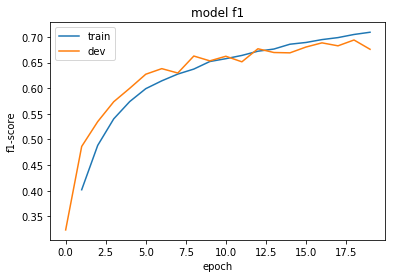

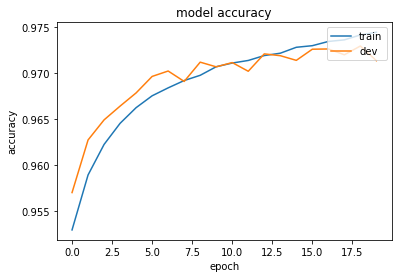

In [10]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(model_ftc_history)

In [14]:
score_ftc = model_ftc.evaluate(model_data_ftc['x_test'],
                              model_data_ftc['y_test'],
                              batch_size=best_model_params_ftc['batch_size'],
                              verbose=1)

print('\nTest f1: %.4f' % (score_ftc[1]))
print('\nTest accuracy: %.4f'% (score_ftc[2]))

12000/12000 [==============================] - 0s 31us/step

Test f1: 0.6655

Test accuracy: 0.9704


[1.0148646322091421, 0.6655337244669597, 0.9704333249727884]

## Visualize Prediction Perfomance of centroids MLP model

In [19]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve)
import matplotlib.pylab as plt

prediction_val_ftc = model_ftc.predict(model_data_ftc['x_test'], batch_size=best_model_params_ftc['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_ftc = np.array([np.argmax(val) for val in prediction_val_ftc])
y_true_processed_ftc = np.array([np.argmax(val) for val in model_data_ftc['y_test']])

# plot_roc_curve(model_data_tf['y_test'], prediction_val, Classes, 1)
# plot_precision_recall_curve(model_data_tf['y_test'], prediction_val, Classes , 1)
confusion = create_clf_report(y_true_processed_ftc, y_pred_processed_ftc, Classes)
confusion

               precision    recall  f1-score   support

          sql      0.570     0.628     0.598       600
ruby-on-rails      0.664     0.825     0.736       600
      android      0.888     0.567     0.692       600
    angularjs      0.883     0.390     0.541       600
      asp.net      0.645     0.895     0.750       600
            c      0.548     0.517     0.532       600
           c#      0.861     0.495     0.629       600
          c++      0.738     0.860     0.794       600
          css      0.523     0.700     0.599       600
         html      0.527     0.593     0.558       600
          ios      0.602     0.432     0.503       600
       iphone      0.613     0.720     0.662       600
         java      0.603     0.653     0.627       600
   javascript      0.843     0.653     0.736       600
       jquery      0.606     0.772     0.679       600
        mysql      0.566     0.573     0.570       600
  objective-c      0.758     0.867     0.809       600
         